# Telepass Insurance Prediction Models
## Model 3: Random Forests

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Load Datasets

In [2]:
# Load the datasets
print("Loading datasets...")
# Adjust path relative to the notebook location (inside the models/3-random-forests directory)
insurance_quotes = pd.read_csv('../../data/insurance_quotes.csv', sep=';')
transactions = pd.read_csv('../../data/transactions.csv', sep=';')

# Display basic information about the datasets
print("Insurance Quotes Dataset:")
print("Shape: {}".format(insurance_quotes.shape))
display(insurance_quotes.head()) # Use display for notebooks

print("Transactions Dataset:")
print("Shape: {}".format(transactions.shape))
display(transactions.head()) # Use display for notebooks

Loading datasets...
Insurance Quotes Dataset:
Shape: (36173, 40)


,client_id,quotation_id,driving_type,car_immatriculation_date,car_brand,car_model,insurance_expires_at,birth_date,gender,county,base_subscription,base_type,pay_subscription,pay_cancellation,premium_subscription,premium_cancellation,operating_system,policy_quoted_at,broker_id,issued,guarantees_purchased,guarantees_available,roadside_assistance,driver_injury,basic_coverage,legal_protection,waive_right_compensation,uninsured_vehicles,protected_bonus,windows,natural_events,theft_fire,kasko,license_revoked,collision,vandalism,key_loss,price_sale,price_full,discount_percent
0,23789,3649,more_than_26,20.7.2011,FORD,C-MAX,12.6.2020,NaN,NaN,FC,24.6.2019,FA,NaN,NaN,11.6.2020,31.12.9998,and,15.3.2020,1,False,NaN,Assistenza Stradale - Collisione - Cristalli -...,1,"37,5","325,48","28,33","25,3",NaN,NaN,"68,1",NaN,"22,7",NaN,NaN,"121,83",NaN,NaN,"325,48","325,48",0
1,10133,28552,more_than_26,1.3.2007,FIAT - INNOCENTI,FIAT CROMA,22.1.2020,NaN,NaN,MS,12.11.2012,FA,NaN,NaN,29.12.2014,31.12.9998,and,8.1.2020,1,False,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,"33,73","271,25","24,43","11,92",NaN,"37,04","34,42",NaN,"22,7",NaN,NaN,"89,99",NaN,NaN,"271,25","306,8","0,115873533"
2,20785,31958,more_than_26,30.8.2017,NISSAN,NISSAN QASHQAI,2.10.2020,22.9.1992,M,SA,26.8.2019,FA,26.8.2019,31.12.9998,NaN,NaN,and,29.4.2020,1,False,NaN,Assistenza Stradale - Infortuni del Conducente...,1,"36,25","640,84","29,5","25,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"640,84","684,01","0,063113112"
3,33892,27614,more_than_26,25.7.2017,FIAT - INNOCENTI,FIAT PANDA,25.7.2020,9.2.1996,M,NaN,12.9.2017,FA,NaN,NaN,13.9.2017,31.12.9998,and,17.3.2020,2,False,NaN,Assistenza Stradale - RCA,1,NaN,"2185,38",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2185,38","2204,87","0,008839523"
4,34153,1529,more_than_26,19.12.2006,FIAT - INNOCENTI,FIAT PUNTO,13.10.2020,8.1.2000,M,CN,29.8.2019,FA,NaN,NaN,NaN,NaN,ios,9.2.2020,1,False,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,"39,13","207,68","24,72","25,3",NaN,"25,45","36,36",NaN,"24,34",NaN,NaN,"156,11",NaN,NaN,"207,68","231,2","0,101730104"


Transactions Dataset:
Shape: (49707, 6)


,client_id,year_month,service_type,telepass_pay,number_transactions,expenditures
0,20785,May.20,PARCHEGGI/TRAGHETTI,0,1,2
1,20785,Sep.19,PARCHEGGI/TRAGHETTI,0,1,2
2,34153,Feb.20,PARCHEGGI/TRAGHETTI,0,1,"3,75"
3,21141,Jan.20,PARCHEGGI/TRAGHETTI,0,1,"3,5"
4,21141,Feb.20,PARCHEGGI/TRAGHETTI,0,1,7


## Check Missing Values

In [3]:
# Check for missing values
print("Missing values in Insurance Quotes Dataset:")
print(insurance_quotes.isnull().sum())

print("Missing values in Transactions Dataset:")
print(transactions.isnull().sum())

Missing values in Insurance Quotes Dataset:
client_id                       0
quotation_id                    0
driving_type                    0
car_immatriculation_date     1710
car_brand                       0
car_model                       0
insurance_expires_at           45
birth_date                  13643
gender                      13581
county                       2827
base_subscription               0
base_type                       0
pay_subscription            26047
pay_cancellation            26047
premium_subscription        13042
premium_cancellation        13042
operating_system             1326
policy_quoted_at                0
broker_id                       0
issued                          0
guarantees_purchased        26059
guarantees_available            0
roadside_assistance             0
driver_injury                 743
basic_coverage                  0
legal_protection              762
waive_right_compensation    15288
uninsured_vehicles          33025
prot

## Preprocessing Functions

In [4]:
# Define a function to preprocess the insurance quotes dataset
def preprocess_insurance_quotes(df):
    """
    Preprocess the insurance quotes dataset for modeling.
    """
    # Make a copy of the dataframe
    df_processed = df.copy()
    
    # Handle date columns
    date_columns = ['car_immatriculation_date', 'insurance_expires_at', 'birth_date', 
                   'base_subscription', 'pay_subscription', 'pay_cancellation',
                   'premium_subscription', 'premium_cancellation', 'policy_quoted_at']
    
    for col in date_columns:
        if col in df_processed.columns:
            try:
                df_processed[col] = pd.to_datetime(df_processed[col], errors='coerce')
            except:
                print(f"Could not convert {col} to datetime.")
    
    # Handle the target variable - properly convert 'TRUE'/'FALSE' to 1/0
    if 'issued' in df_processed.columns:
        df_processed['issued'] = df_processed['issued'].map({True: 1, 'TRUE': 1, False: 0, 'FALSE': 0})
    
    # Convert numeric columns with comma separators
    numeric_columns = ['driver_injury', 'basic_coverage', 'legal_protection', 
                       'waive_right_compensation', 'uninsured_vehicles', 
                       'protected_bonus', 'windows', 'natural_events', 
                       'theft_fire', 'kasko', 'license_revoked', 
                       'collision', 'vandalism', 'key_loss', 
                       'price_sale', 'price_full', 'discount_percent']
    
    for col in numeric_columns:
        if col in df_processed.columns:
            # Check if column is not already numeric before attempting conversion
            if not pd.api.types.is_numeric_dtype(df_processed[col]):
               try:
                   df_processed[col] = df_processed[col].astype(str).str.replace(',', '.').astype(float)
               except Exception as e:
                   print(f"Could not convert {col} to float: {e}") 
            else:
                df_processed[col] = df_processed[col].astype(float) # Ensure it's float if already numeric

    # Create derived features
    # Calculate age at policy quote time
    if 'birth_date' in df_processed.columns and 'policy_quoted_at' in df_processed.columns:
        if pd.api.types.is_datetime64_any_dtype(df_processed['birth_date']) and pd.api.types.is_datetime64_any_dtype(df_processed['policy_quoted_at']):
            mask = df_processed['birth_date'].notna() & df_processed['policy_quoted_at'].notna()
            df_processed.loc[mask, 'age'] = (df_processed.loc[mask, 'policy_quoted_at'] - 
                                             df_processed.loc[mask, 'birth_date']).dt.days / 365.25

    # Calculate car age at policy quote time
    if 'car_immatriculation_date' in df_processed.columns and 'policy_quoted_at' in df_processed.columns:
       if pd.api.types.is_datetime64_any_dtype(df_processed['car_immatriculation_date']) and pd.api.types.is_datetime64_any_dtype(df_processed['policy_quoted_at']):
           mask = df_processed['car_immatriculation_date'].notna() & df_processed['policy_quoted_at'].notna()
           df_processed.loc[mask, 'car_age'] = (df_processed.loc[mask, 'policy_quoted_at'] - 
                                               df_processed.loc[mask, 'car_immatriculation_date']).dt.days / 365.25

    # Telepass membership duration
    if 'base_subscription' in df_processed.columns and 'policy_quoted_at' in df_processed.columns:
       if pd.api.types.is_datetime64_any_dtype(df_processed['base_subscription']) and pd.api.types.is_datetime64_any_dtype(df_processed['policy_quoted_at']):
           mask = df_processed['base_subscription'].notna() & df_processed['policy_quoted_at'].notna()
           df_processed.loc[mask, 'telepass_membership_years'] = (df_processed.loc[mask, 'policy_quoted_at'] - 
                                                                 df_processed.loc[mask, 'base_subscription']).dt.days / 365.25

    # Flag customers with TelepassPay
    if 'pay_subscription' in df_processed.columns and 'pay_cancellation' in df_processed.columns:
        df_processed['has_telepass_pay'] = 0
        if pd.api.types.is_datetime64_any_dtype(df_processed['pay_subscription']) and pd.api.types.is_datetime64_any_dtype(df_processed['pay_cancellation']):
           # If they have a pay_subscription but no cancellation or cancellation is far in the future
           mask = (df_processed['pay_subscription'].notna() & 
                   (df_processed['pay_cancellation'].isna() | 
                    (df_processed['pay_cancellation'] > pd.to_datetime('2025-01-01'))))
           df_processed.loc[mask, 'has_telepass_pay'] = 1
        else:
             # Handle cases where conversion might have failed, default to 0
             df_processed['has_telepass_pay'] = df_processed['pay_subscription'].notna().astype(int) 

    # Flag customers with Telepass Premium
    if 'premium_subscription' in df_processed.columns and 'premium_cancellation' in df_processed.columns:
        df_processed['has_telepass_premium'] = 0
        if pd.api.types.is_datetime64_any_dtype(df_processed['premium_subscription']) and pd.api.types.is_datetime64_any_dtype(df_processed['premium_cancellation']):
           # If they have a premium_subscription but no cancellation or cancellation is far in the future
           mask = (df_processed['premium_subscription'].notna() & 
                   (df_processed['premium_cancellation'].isna() | 
                    (df_processed['premium_cancellation'] > pd.to_datetime('2025-01-01'))))
           df_processed.loc[mask, 'has_telepass_premium'] = 1
        else:
             df_processed['has_telepass_premium'] = df_processed['premium_subscription'].notna().astype(int) 

    # Count available guarantees
    if 'guarantees_available' in df_processed.columns:
       # Ensure it's string type before counting, handle NaNs
       df_processed['num_guarantees_available'] = df_processed['guarantees_available'].fillna('').astype(str).str.count('-') + df_processed['guarantees_available'].notna().astype(int) # Add 1 only if not NaN and contains '-' or not
       # A simpler way might be just counting non-empty strings if format is consistent
       # Example: df_processed['num_guarantees_available'] = df_processed['guarantees_available'].str.split('-').str.len() # if guarantees are always dash-separated
       # Using the original logic for now, but added robustness
       df_processed['num_guarantees_available'] = df_processed['guarantees_available'].astype(str).apply(lambda x: len(x.split('-')) if pd.notna(x) and x else 0)

    return df_processed

# Define a function to preprocess the transactions dataset
def preprocess_transactions(df):
    """
    Preprocess the transactions dataset for modeling.
    """
    # Make a copy of the dataframe
    df_processed = df.copy()
    
    # Convert year_month to datetime
    if 'year_month' in df_processed.columns:
        try:
            df_processed['year_month'] = pd.to_datetime(df_processed['year_month'], format='%b.%y', errors='coerce')
        except Exception as e:
            print(f"Could not convert year_month to datetime: {e}")
    
    # Handle numerical values
    if 'expenditures' in df_processed.columns:
        if not pd.api.types.is_numeric_dtype(df_processed['expenditures']):
           try:
                df_processed['expenditures'] = df_processed['expenditures'].astype(str).str.replace(',', '.').astype(float)
           except Exception as e:
               print(f"Could not convert expenditures to float: {e}") 
        else:
            df_processed['expenditures'] = df_processed['expenditures'].astype(float)

    return df_processed

# Function to create aggregate features per client from transactions
def create_transaction_features(df):
    """
    Aggregate transaction data to create features at the client level.
    """
    if 'client_id' not in df.columns:
        print("Error: 'client_id' column not found in transaction data.")
        return pd.DataFrame() # Return empty dataframe

    # Ensure required columns exist and have correct types
    required_cols = {'number_transactions': 'numeric', 'expenditures': 'numeric', 'year_month': 'datetime', 'service_type': 'object', 'telepass_pay': 'numeric'}
    for col, dtype in required_cols.items():
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found, cannot compute related features.")
            # Optionally create a dummy column if needed later
            if dtype == 'numeric': df[col] = 0
            elif dtype == 'datetime': df[col] = pd.NaT
            else: df[col] = 'Unknown' 
            
    # Safe division function
    def safe_divide(numerator, denominator):
        return numerator / denominator if denominator != 0 else 0

    # Calculate total transactions and expenditures per client
    client_stats = df.groupby('client_id').agg(
        total_transactions=('number_transactions', 'sum'),
        total_expenditures=('expenditures', 'sum'),
        # Calculate avg_expenditure safely
        avg_expenditure_per_transaction=('expenditures', lambda x: safe_divide(x.sum(), df.loc[x.index, 'number_transactions'].sum())),
        num_months_active=('year_month', 'nunique'),
        num_service_types=('service_type', 'nunique')
    ).reset_index()

    # Calculate statistics for telepass_pay transactions
    telepass_pay_stats = df[df['telepass_pay'] == 1].groupby('client_id').agg(
        telepass_pay_transactions=('number_transactions', 'sum'),
        telepass_pay_expenditures=('expenditures', 'sum')
    ).reset_index()

    # Merge features, ensuring client_id exists in both
    client_features = client_stats.merge(telepass_pay_stats, on='client_id', how='left')

    # Fill NaN values introduced by the left merge
    client_features['telepass_pay_transactions'] = client_features['telepass_pay_transactions'].fillna(0)
    client_features['telepass_pay_expenditures'] = client_features['telepass_pay_expenditures'].fillna(0)

    # Calculate percentage features safely
    client_features['telepass_pay_pct'] = client_features.apply(
        lambda row: safe_divide(row['telepass_pay_transactions'], row['total_transactions']), axis=1
    )
    client_features['telepass_pay_expenditures_pct'] = client_features.apply(
        lambda row: safe_divide(row['telepass_pay_expenditures'], row['total_expenditures']), axis=1
    )

    # Handle potential division by zero resulting in inf or NaN (although safe_divide should prevent inf)
    client_features.replace([np.inf, -np.inf], 0, inplace=True)
    client_features.fillna(0, inplace=True)

    return client_features

## Apply Preprocessing and Feature Engineering

In [5]:
# Preprocess the datasets
print("Preprocessing datasets...")
insurance_quotes_processed = preprocess_insurance_quotes(insurance_quotes)
transactions_processed = preprocess_transactions(transactions)

# Display the preprocessed datasets
print("Preprocessed Insurance Quotes Dataset:")
display(insurance_quotes_processed.head())
print("Preprocessed Transactions Dataset:")
display(transactions_processed.head())

Preprocessing datasets...
Preprocessed Insurance Quotes Dataset:


,client_id,quotation_id,driving_type,car_immatriculation_date,car_brand,car_model,insurance_expires_at,birth_date,gender,county,base_subscription,base_type,pay_subscription,pay_cancellation,premium_subscription,premium_cancellation,operating_system,policy_quoted_at,broker_id,issued,guarantees_purchased,guarantees_available,roadside_assistance,driver_injury,basic_coverage,legal_protection,waive_right_compensation,uninsured_vehicles,protected_bonus,windows,natural_events,theft_fire,kasko,license_revoked,collision,vandalism,key_loss,price_sale,price_full,discount_percent,age,car_age,telepass_membership_years,has_telepass_pay,has_telepass_premium,num_guarantees_available
0,23789,3649,more_than_26,2011-07-20,FORD,C-MAX,2020-12-06,NaT,NaN,FC,2019-06-24,FA,NaT,NaT,2020-11-06,NaT,and,2020-03-15,1,0,NaN,Assistenza Stradale - Collisione - Cristalli -...,1,37.50,325.48,28.33,25.30,NaN,NaN,68.10,NaN,22.70,NaN,NaN,121.83,NaN,NaN,325.48,325.48,0.000000,NaN,8.654346,0.725530,0,1,8
1,10133,28552,more_than_26,2007-03-01,FIAT - INNOCENTI,FIAT CROMA,NaT,NaT,NaN,MS,2012-11-12,FA,NaT,NaT,NaT,NaT,and,2020-01-08,1,0,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,33.73,271.25,24.43,11.92,NaN,37.04,34.42,NaN,22.70,NaN,NaN,89.99,NaN,NaN,271.25,306.80,0.115874,NaN,12.856947,7.154004,0,0,9
2,20785,31958,more_than_26,2017-08-30,NISSAN,NISSAN QASHQAI,2020-02-10,1992-09-22,M,SA,2019-08-26,FA,2019-08-26,NaT,NaT,NaT,and,2020-04-29,1,0,NaN,Assistenza Stradale - Infortuni del Conducente...,1,36.25,640.84,29.50,25.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640.84,684.01,0.063113,27.600274,2.663929,0.676249,1,0,5
3,33892,27614,more_than_26,2017-07-25,FIAT - INNOCENTI,FIAT PANDA,NaT,1996-02-09,M,NaN,2017-09-12,FA,NaT,NaT,NaT,NaT,and,2020-03-17,2,0,NaN,Assistenza Stradale - RCA,1,NaN,2185.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.38,2204.87,0.008840,24.101300,2.644764,2.510609,0,0,2
4,34153,1529,more_than_26,2006-12-19,FIAT - INNOCENTI,FIAT PUNTO,NaT,2000-01-08,M,CN,2019-08-29,FA,NaT,NaT,NaT,NaT,ios,2020-02-09,1,0,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,39.13,207.68,24.72,25.30,NaN,25.45,36.36,NaN,24.34,NaN,NaN,156.11,NaN,NaN,207.68,231.20,0.101730,20.087611,13.141684,0.449008,0,0,9


Preprocessed Transactions Dataset:


,client_id,year_month,service_type,telepass_pay,number_transactions,expenditures
0,20785,2020-05-01,PARCHEGGI/TRAGHETTI,0,1,2.00
1,20785,2019-09-01,PARCHEGGI/TRAGHETTI,0,1,2.00
2,34153,2020-02-01,PARCHEGGI/TRAGHETTI,0,1,3.75
3,21141,2020-01-01,PARCHEGGI/TRAGHETTI,0,1,3.50
4,21141,2020-02-01,PARCHEGGI/TRAGHETTI,0,1,7.00


In [7]:
# Create transaction features
print("Creating transaction features...")
transaction_features = create_transaction_features(transactions_processed)
display(transaction_features.head())

Creating transaction features...


,client_id,total_transactions,total_expenditures,avg_expenditure_per_transaction,num_months_active,num_service_types,telepass_pay_transactions,telepass_pay_expenditures,telepass_pay_pct,telepass_pay_expenditures_pct
0,2,2,615.707998,307.853999,2,1,2.0,615.707998,1.0,1.0
1,3,1,4.200000,4.200000,1,1,0.0,0.000000,0.0,0.0
2,5,1,5.000000,5.000000,1,1,1.0,5.000000,1.0,1.0
3,8,5,27.000000,5.400000,3,1,0.0,0.000000,0.0,0.0
4,10,2,24.700000,12.350000,2,1,0.0,0.000000,0.0,0.0


## Merge Datasets

In [8]:
# Merge the datasets
print("Merging datasets...")
merged_data = insurance_quotes_processed.merge(
    transaction_features, 
    on='client_id', 
    how='left'
)

# Fill missing transaction data for clients who didn't exist in transactions_features
transaction_feature_cols = transaction_features.drop(columns=['client_id']).columns
fill_values = {col: 0 for col in transaction_feature_cols} # Default fill with 0
merged_data.fillna(value=fill_values, inplace=True)

print(f"Shape of merged data: {merged_data.shape}")
display(merged_data.head())

Merging datasets...
Shape of merged data: (36173, 55)


,client_id,quotation_id,driving_type,car_immatriculation_date,car_brand,car_model,insurance_expires_at,birth_date,gender,county,base_subscription,base_type,pay_subscription,pay_cancellation,premium_subscription,premium_cancellation,operating_system,policy_quoted_at,broker_id,issued,guarantees_purchased,guarantees_available,roadside_assistance,driver_injury,basic_coverage,legal_protection,waive_right_compensation,uninsured_vehicles,protected_bonus,windows,natural_events,theft_fire,kasko,license_revoked,collision,vandalism,key_loss,price_sale,price_full,discount_percent,age,car_age,telepass_membership_years,has_telepass_pay,has_telepass_premium,num_guarantees_available,total_transactions,total_expenditures,avg_expenditure_per_transaction,num_months_active,num_service_types,telepass_pay_transactions,telepass_pay_expenditures,telepass_pay_pct,telepass_pay_expenditures_pct
0,23789,3649,more_than_26,2011-07-20,FORD,C-MAX,2020-12-06,NaT,NaN,FC,2019-06-24,FA,NaT,NaT,2020-11-06,NaT,and,2020-03-15,1,0,NaN,Assistenza Stradale - Collisione - Cristalli -...,1,37.50,325.48,28.33,25.30,NaN,NaN,68.10,NaN,22.70,NaN,NaN,121.83,NaN,NaN,325.48,325.48,0.000000,NaN,8.654346,0.725530,0,1,8,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,10133,28552,more_than_26,2007-03-01,FIAT - INNOCENTI,FIAT CROMA,NaT,NaT,NaN,MS,2012-11-12,FA,NaT,NaT,NaT,NaT,and,2020-01-08,1,0,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,33.73,271.25,24.43,11.92,NaN,37.04,34.42,NaN,22.70,NaN,NaN,89.99,NaN,NaN,271.25,306.80,0.115874,NaN,12.856947,7.154004,0,0,9,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,20785,31958,more_than_26,2017-08-30,NISSAN,NISSAN QASHQAI,2020-02-10,1992-09-22,M,SA,2019-08-26,FA,2019-08-26,NaT,NaT,NaT,and,2020-04-29,1,0,NaN,Assistenza Stradale - Infortuni del Conducente...,1,36.25,640.84,29.50,25.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640.84,684.01,0.063113,27.600274,2.663929,0.676249,1,0,5,2.0,4.00,2.00,2.0,1.0,0.0,0.0,0.0,0.0
3,33892,27614,more_than_26,2017-07-25,FIAT - INNOCENTI,FIAT PANDA,NaT,1996-02-09,M,NaN,2017-09-12,FA,NaT,NaT,NaT,NaT,and,2020-03-17,2,0,NaN,Assistenza Stradale - RCA,1,NaN,2185.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.38,2204.87,0.008840,24.101300,2.644764,2.510609,0,0,2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,34153,1529,more_than_26,2006-12-19,FIAT - INNOCENTI,FIAT PUNTO,NaT,2000-01-08,M,CN,2019-08-29,FA,NaT,NaT,NaT,NaT,ios,2020-02-09,1,0,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,39.13,207.68,24.72,25.30,NaN,25.45,36.36,NaN,24.34,NaN,NaN,156.11,NaN,NaN,207.68,231.20,0.101730,20.087611,13.141684,0.449008,0,0,9,1.0,3.75,3.75,1.0,1.0,0.0,0.0,0.0,0.0


## Prepare Data for Modeling

In [9]:
# Check the values in the issued column
print("Values in the issued column:")
if 'issued' in merged_data.columns:
    print(merged_data['issued'].value_counts(dropna=False))
    # Drop rows with NaN in the target variable
    print("Removing rows with missing target values...")
    initial_rows = merged_data.shape[0]
    merged_data = merged_data.dropna(subset=['issued'])
    rows_dropped = initial_rows - merged_data.shape[0]
    print(f"Dropped {rows_dropped} rows with missing target.")
    print(f"Shape after removing rows with missing target: {merged_data.shape}")
    
    # Ensure target is integer
    if pd.api.types.is_numeric_dtype(merged_data['issued']):
       merged_data['issued'] = merged_data['issued'].astype(int)
    else:
       print("Warning: Target column 'issued' is not numeric after dropna.") 
else:
    print("Error: Target column 'issued' not found in merged data.")
    # Handle error appropriately, e.g., raise exception or exit
    # raise ValueError("Target column 'issued' is missing.")

Values in the issued column:
issued
0    26059
1    10114
Name: count, dtype: int64
Removing rows with missing target values...
Dropped 0 rows with missing target.
Shape after removing rows with missing target: (36173, 55)


In [10]:
# Feature selection for the model
print("Selecting features for modeling...")

# Define potential numerical and categorical features
potential_numerical_features = [
    'basic_coverage', 'price_sale', 'price_full', 'discount_percent',
    'age', 'car_age', 'telepass_membership_years', 'num_guarantees_available',
    'total_transactions', 'total_expenditures', 'avg_expenditure_per_transaction',
    'num_months_active', 'num_service_types', 'telepass_pay_transactions',
    'telepass_pay_expenditures', 'telepass_pay_pct', 'telepass_pay_expenditures_pct'
]

potential_categorical_features = [
    'driving_type', 'car_brand', 'gender', 'operating_system', 'broker_id',
    'roadside_assistance', 'has_telepass_pay', 'has_telepass_premium', 'base_type'
]

# Target variable
target = 'issued'

# Filter features to only those available in the merged_data
available_numerical = [f for f in potential_numerical_features if f in merged_data.columns]
available_categorical = [f for f in potential_categorical_features if f in merged_data.columns]
selected_features = available_numerical + available_categorical

print(f"Available numerical features selected: {available_numerical}")
print(f"Available categorical features selected: {available_categorical}")

# Create the final modeling dataset
if target in merged_data.columns:
    model_data = merged_data[selected_features + [target]].copy()

    # Handle remaining missing values (median for numeric, mode for categorical)
    print("Handling final missing values...")
    for col in available_numerical:
        if model_data[col].isnull().any():
            median_val = model_data[col].median()
            model_data[col].fillna(median_val, inplace=True)
            print(f"Filled NaNs in numerical '{col}' with median {median_val}")
            
    for col in available_categorical:
        if model_data[col].isnull().any():
            # Check if mode() returns empty (can happen if all values are NaN)
            if not model_data[col].mode().empty:
               mode_val = model_data[col].mode()[0]
               model_data[col].fillna(mode_val, inplace=True)
               print(f"Filled NaNs in categorical '{col}' with mode '{mode_val}'")
            else:
               # Handle cases where mode cannot be computed (e.g., fill with a placeholder)
               placeholder = 'Unknown'
               model_data[col].fillna(placeholder, inplace=True)
               print(f"Filled NaNs in categorical '{col}' with placeholder '{placeholder}' as mode was unavailable")

    # Final check for missing values
    print("Final missing value check:")
    print(model_data.isnull().sum())
    
    # Print some basic statistics about the final dataset
    print(f"Final dataset shape: {model_data.shape}")
    print("Class distribution:")
    print(model_data[target].value_counts(normalize=True))
    display(model_data.head())
else:
    print("Error: Target column '{target}' not found after processing.")

Selecting features for modeling...
Available numerical features selected: ['basic_coverage', 'price_sale', 'price_full', 'discount_percent', 'age', 'car_age', 'telepass_membership_years', 'num_guarantees_available', 'total_transactions', 'total_expenditures', 'avg_expenditure_per_transaction', 'num_months_active', 'num_service_types', 'telepass_pay_transactions', 'telepass_pay_expenditures', 'telepass_pay_pct', 'telepass_pay_expenditures_pct']
Available categorical features selected: ['driving_type', 'car_brand', 'gender', 'operating_system', 'broker_id', 'roadside_assistance', 'has_telepass_pay', 'has_telepass_premium', 'base_type']
Handling final missing values...
Filled NaNs in numerical 'age' with median 45.661875427789184
Filled NaNs in numerical 'car_age' with median 7.268993839835729
Filled NaNs in categorical 'gender' with mode 'M'
Filled NaNs in categorical 'operating_system' with mode 'and'
Final missing value check:
basic_coverage                     0
price_sale            

,basic_coverage,price_sale,price_full,discount_percent,age,car_age,telepass_membership_years,num_guarantees_available,total_transactions,total_expenditures,avg_expenditure_per_transaction,num_months_active,num_service_types,telepass_pay_transactions,telepass_pay_expenditures,telepass_pay_pct,telepass_pay_expenditures_pct,driving_type,car_brand,gender,operating_system,broker_id,roadside_assistance,has_telepass_pay,has_telepass_premium,base_type,issued
0,325.48,325.48,325.48,0.000000,45.661875,8.654346,0.725530,8,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,more_than_26,FORD,M,and,1,1,0,1,FA,0
1,271.25,271.25,306.80,0.115874,45.661875,12.856947,7.154004,9,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,more_than_26,FIAT - INNOCENTI,M,and,1,1,0,0,FA,0
2,640.84,640.84,684.01,0.063113,27.600274,2.663929,0.676249,5,2.0,4.00,2.00,2.0,1.0,0.0,0.0,0.0,0.0,more_than_26,NISSAN,M,and,1,1,1,0,FA,0
3,2185.38,2185.38,2204.87,0.008840,24.101300,2.644764,2.510609,2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,more_than_26,FIAT - INNOCENTI,M,and,2,1,0,0,FA,0
4,207.68,207.68,231.20,0.101730,20.087611,13.141684,0.449008,9,1.0,3.75,3.75,1.0,1.0,0.0,0.0,0.0,0.0,more_than_26,FIAT - INNOCENTI,M,ios,1,1,0,0,FA,0


## Split Data

In [11]:
# Split the data into train and test sets
if 'model_data' in locals() and target in model_data.columns:
    X = model_data[selected_features] # Use only selected features
    y = model_data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, # 20% for testing
        random_state=42, # for reproducibility
        stratify=y # preserve class distribution
    )

    print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
    print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")
else:
    print("Error: model_data is not defined or target is missing. Cannot split data.")
    # Set defaults to prevent errors later, though this indicates a problem
    X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.Series(), pd.Series()

Training set shape: X=(28938, 26), y=(28938,)
Test set shape: X=(7235, 26), y=(7235,)


## Define Preprocessing Pipeline

In [12]:
# Define preprocessing for numerical and categorical features
# Use the 'available' lists determined during feature selection

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing with median
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # One-hot encode
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, available_numerical),
        ('cat', categorical_transformer, available_categorical)
    ], 
    remainder='drop' # Drop columns not specified in transformers
)

## Build and Train Random Forest Model (Initial)

In [13]:
# Create a pipeline with preprocessing and the Random Forest model
print("Building Initial Random Forest model...")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,          # For reproducibility
        class_weight='balanced',  # Handle class imbalance
        n_estimators=100,         # Default number of trees
        n_jobs=-1                 # Use all available CPU cores
    ))
])

# Train the initial model
if not X_train.empty:
    print("Training the initial model...")
    rf_pipeline.fit(X_train, y_train)
    print("Initial model training complete.")
else:
    print("Cannot train model: Training data is empty.")

Building Initial Random Forest model...
Training the initial model...
Initial model training complete.


## Evaluate Initial Model

In [14]:
# Make predictions and evaluate the initial model
if not X_test.empty and 'rf_pipeline' in locals() and hasattr(rf_pipeline, 'predict'):
    print("Evaluating Initial Model...")
    y_pred = rf_pipeline.predict(X_test)
    y_prob = rf_pipeline.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy_init = accuracy_score(y_test, y_pred)
    precision_init = precision_score(y_test, y_pred)
    recall_init = recall_score(y_test, y_pred)
    f1_init = f1_score(y_test, y_pred)
    roc_auc_init = roc_auc_score(y_test, y_prob)
    
    print(f"Accuracy: {accuracy_init:.4f}")
    print(f"Precision: {precision_init:.4f}")
    print(f"Recall: {recall_init:.4f}")
    print(f"F1 Score: {f1_init:.4f}")
    print(f"ROC AUC: {roc_auc_init:.4f}")

    print("Classification Report (Initial Model):")
    print(classification_report(y_test, y_pred))
else:
    print("Cannot evaluate model: Test data or pipeline is not available.")

Evaluating Initial Model...
Accuracy: 0.7523
Precision: 0.7167
Recall: 0.1888
F1 Score: 0.2989
ROC AUC: 0.7155
Classification Report (Initial Model):
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      5212
           1       0.72      0.19      0.30      2023

    accuracy                           0.75      7235
   macro avg       0.74      0.58      0.57      7235
weighted avg       0.74      0.75      0.70      7235



## Visualize Initial Model Performance

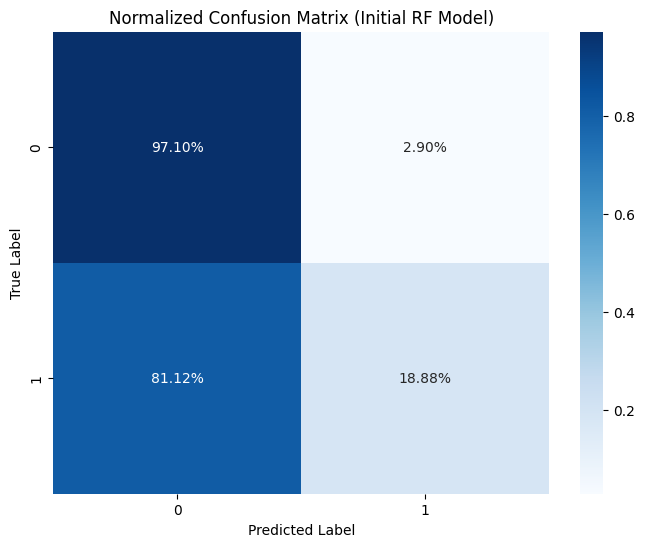

In [15]:
# Plot confusion matrix for the initial model
if 'y_test' in locals() and 'y_pred' in locals():
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(conf_matrix, annot=True, fmt='.2%', cmap='Blues')
    plt.title('Normalized Confusion Matrix (Initial RF Model)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig('confusion_matrix_rf.png') # Save the plot
    plt.show() # Display inline
    plt.close()
else:
    print("Cannot plot confusion matrix: y_test or y_pred not defined.")

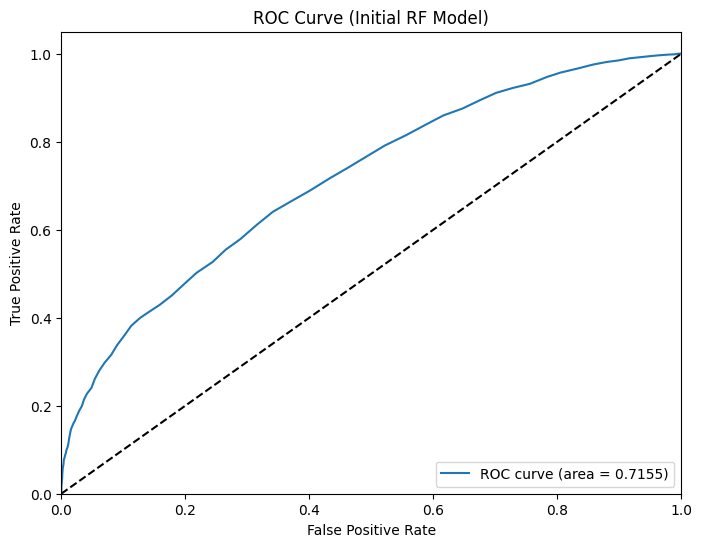

In [16]:
# Plot ROC curve for the initial model
if 'y_test' in locals() and 'y_prob' in locals():
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_init:.4f})')
    plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Initial RF Model)')
    plt.legend(loc="lower right")
    plt.savefig('roc_curve_rf.png') # Save the plot
    plt.show() # Display inline
    plt.close()
else:
    print("Cannot plot ROC curve: y_test or y_prob not defined.")

## Hyperparameter Tuning (Grid Search)

In [17]:
# Hyperparameter tuning using GridSearchCV
print("Tuning Hyperparameters...")

# Define a smaller parameter grid for faster tuning (adjust as needed)
param_grid = {
    'classifier__n_estimators': [100, 200], # Number of trees
    'classifier__max_depth': [10, 20, None], # Max depth of trees (None means unlimited)
    'classifier__min_samples_split': [2, 5, 10], # Min samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4] # Min samples in a leaf node
    # 'classifier__max_features': ['sqrt', 'log2', None] # Number of features to consider for best split
}

if not X_train.empty:
    grid_search = GridSearchCV(
        rf_pipeline, # The pipeline object
        param_grid, # Parameters to tune
        cv=3, # Number of cross-validation folds (adjust for speed vs robustness)
        scoring='roc_auc', # Metric to optimize
        n_jobs=-1, # Use all available CPU cores
        verbose=1 # Show progress
    )

    print("Starting GridSearchCV... This might take a while.")
    grid_search.fit(X_train, y_train)
    print("GridSearchCV complete.")

    print("Best Parameters found by GridSearchCV:")
    print(grid_search.best_params_)
    print(f"Best ROC AUC Score from GridSearchCV: {grid_search.best_score_:.4f}")
    
    # Store the best model
    best_model = grid_search.best_estimator_
else:
    print("Cannot perform GridSearch: Training data is empty.")
    best_model = rf_pipeline # Fallback to initial pipeline if tuning failed

Tuning Hyperparameters...
Starting GridSearchCV... This might take a while.
Fitting 3 folds for each of 54 candidates, totalling 162 fits
GridSearchCV complete.
Best Parameters found by GridSearchCV:
{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best ROC AUC Score from GridSearchCV: 0.7358


## Evaluate Best Model (After Tuning)

In [18]:
# Evaluate the best model found by GridSearch
if not X_test.empty and 'best_model' in locals() and hasattr(best_model, 'predict'):
    print("Evaluating Best Model (after Tuning)...")
    y_pred_best = best_model.predict(X_test)
    y_prob_best = best_model.predict_proba(X_test)[:, 1]

    # Evaluate the best model
    accuracy_best = accuracy_score(y_test, y_pred_best)
    precision_best = precision_score(y_test, y_pred_best)
    recall_best = recall_score(y_test, y_pred_best)
    f1_best = f1_score(y_test, y_pred_best)
    roc_auc_best = roc_auc_score(y_test, y_prob_best)
    
    print(f"Accuracy: {accuracy_best:.4f}")
    print(f"Precision: {precision_best:.4f}")
    print(f"Recall: {recall_best:.4f}")
    print(f"F1 Score: {f1_best:.4f}")
    print(f"ROC AUC: {roc_auc_best:.4f}")

    print("Classification Report for Best Model:")
    print(classification_report(y_test, y_pred_best))
else:
    print("Cannot evaluate best model: Test data or best_model is not available.")
    # Initialize metrics to avoid errors in later cells if evaluation failed
    accuracy_best, precision_best, recall_best, f1_best, roc_auc_best = 0, 0, 0, 0, 0

Evaluating Best Model (after Tuning)...
Accuracy: 0.7095
Precision: 0.4809
Recall: 0.4904
F1 Score: 0.4856
ROC AUC: 0.7306
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      5212
           1       0.48      0.49      0.49      2023

    accuracy                           0.71      7235
   macro avg       0.64      0.64      0.64      7235
weighted avg       0.71      0.71      0.71      7235



## Visualize Best Model Performance

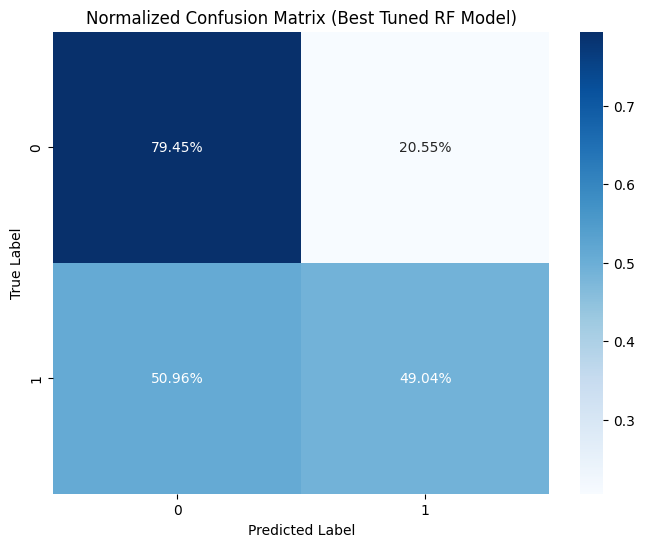

In [19]:
# Plot confusion matrix for the best model
if 'y_test' in locals() and 'y_pred_best' in locals():
    plt.figure(figsize=(8, 6))
    conf_matrix_best = confusion_matrix(y_test, y_pred_best, normalize='true')
    sns.heatmap(conf_matrix_best, annot=True, fmt='.2%', cmap='Blues')
    plt.title('Normalized Confusion Matrix (Best Tuned RF Model)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig('confusion_matrix_rf_best.png') # Save the plot
    plt.show() # Display inline
    plt.close()
else:
    print("Cannot plot confusion matrix: y_test or y_pred_best not defined.")

## Feature Importance (Best Model)

Top 20 Important Features (Best Model):


,Feature,Importance
0,discount_percent,0.095085
1,price_full,0.073991
2,basic_coverage,0.071585
3,total_transactions,0.071263
4,price_sale,0.068967
5,total_expenditures,0.063421
6,car_age,0.059469
7,telepass_membership_years,0.058831
8,age,0.053894
9,num_months_active,0.052466


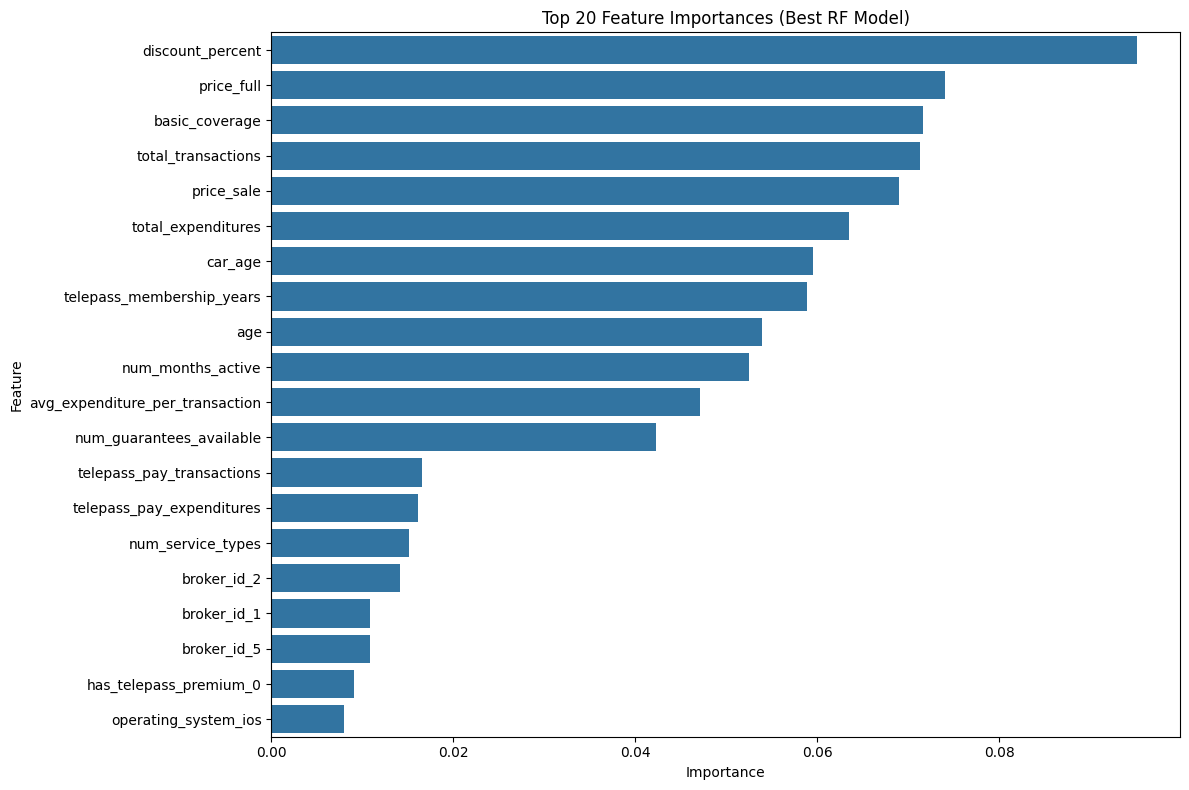

In [20]:
# Feature importance from the best random forest model
if 'best_model' in locals() and hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    try:
        # Get feature names after preprocessing
        preprocessor_step = best_model.named_steps['preprocessor']
        
        # Get numerical feature names
        num_feature_names = available_numerical 
        
        # Get categorical feature names from the OneHotEncoder
        cat_transformer = preprocessor_step.named_transformers_['cat']
        ohe_step = cat_transformer.named_steps['onehot']
        cat_feature_names = ohe_step.get_feature_names_out(available_categorical)
        
        # Combine feature names
        feature_names = num_feature_names + list(cat_feature_names)
        
        # Get feature importances
        importances = best_model.named_steps['classifier'].feature_importances_
        
        # Ensure lengths match
        if len(feature_names) == len(importances):
            feature_importance = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)
            
            # Display top 20 features
            print("Top 20 Important Features (Best Model):")
            display(feature_importance.head(20))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
            plt.title('Top 20 Feature Importances (Best RF Model)')
            plt.tight_layout()
            plt.savefig('feature_importance_rf.png') # Save the plot
            plt.show() # Display inline
            plt.close()
        else:
            print(f"Error: Number of feature names ({len(feature_names)}) does not match number of importances ({len(importances)}).")
            print("Feature names:", feature_names)
            print("Importances:", importances)

    except Exception as e:
        print(f"Error calculating or plotting feature importance: {e}")
else:
    print("Cannot extract feature importance: best_model or classifier step not found or does not have feature_importances_ attribute.")

## Model Comparison Summary

In [21]:
# Compare models based on the results stored in README or previous steps
# Assuming values from README for LR and DT for simplicity here
lr_metrics = {'Accuracy': 0.613, 'Precision': 0.383, 'Recall': 0.630, 'F1 Score': 0.476, 'ROC AUC': 0.670}
dt_metrics = {'Accuracy': 0.657, 'Precision': 0.428, 'Recall': 0.679, 'F1 Score': 0.525, 'ROC AUC': 0.745}
rf_metrics = {'Accuracy': accuracy_best, 'Precision': precision_best, 'Recall': recall_best, 'F1 Score': f1_best, 'ROC AUC': roc_auc_best}

comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Logistic Regression': [lr_metrics['Accuracy'], lr_metrics['Precision'], lr_metrics['Recall'], lr_metrics['F1 Score'], lr_metrics['ROC AUC']],
    'Decision Tree': [dt_metrics['Accuracy'], dt_metrics['Precision'], dt_metrics['Recall'], dt_metrics['F1 Score'], dt_metrics['ROC AUC']],
    'Random Forest (Best)': [rf_metrics['Accuracy'], rf_metrics['Precision'], rf_metrics['Recall'], rf_metrics['F1 Score'], rf_metrics['ROC AUC']]
}

comparison_df = pd.DataFrame(comparison_data)

print("Model Performance Comparison:")
display(comparison_df.round(3))

Model Performance Comparison:


,Metric,Logistic Regression,Decision Tree,Random Forest (Best)
0,Accuracy,0.613,0.657,0.709
1,Precision,0.383,0.428,0.481
2,Recall,0.630,0.679,0.490
3,F1 Score,0.476,0.525,0.486
4,ROC AUC,0.670,0.745,0.731


## Random Forest Model Analysis Summary

In [22]:
print("Random Forest Model Analysis Completed.")
print("Model Strengths:")
print("1. Ensemble Learning: Combines multiple decision trees, reducing overfitting and variance compared to single trees.")
print("2. High Accuracy: Often achieves high prediction accuracy on complex datasets.")
print("3. Feature Importance: Provides a robust measure of feature importance, aggregated across all trees.")
print("4. Handles Non-linearity: Effectively captures complex non-linear relationships and feature interactions.")
print("5. Robustness: Less sensitive to outliers and noise compared to individual decision trees.")

print("Model Weaknesses:")
print("1. Interpretability: 'Black box' nature makes it harder to interpret the exact decision logic compared to a single tree or logistic regression.")
print("2. Computational Cost: Can be computationally expensive to train, especially with a large number of trees or features.")
print("3. Memory Usage: Requires more memory to store the ensemble of trees.")
print("4. Parameter Sensitivity: Performance can be sensitive to hyperparameters like the number of trees, tree depth, etc., requiring tuning.")

Random Forest Model Analysis Completed.
Model Strengths:
1. Ensemble Learning: Combines multiple decision trees, reducing overfitting and variance compared to single trees.
2. High Accuracy: Often achieves high prediction accuracy on complex datasets.
3. Feature Importance: Provides a robust measure of feature importance, aggregated across all trees.
4. Handles Non-linearity: Effectively captures complex non-linear relationships and feature interactions.
5. Robustness: Less sensitive to outliers and noise compared to individual decision trees.
Model Weaknesses:
1. Interpretability: 'Black box' nature makes it harder to interpret the exact decision logic compared to a single tree or logistic regression.
2. Computational Cost: Can be computationally expensive to train, especially with a large number of trees or features.
3. Memory Usage: Requires more memory to store the ensemble of trees.
4. Parameter Sensitivity: Performance can be sensitive to hyperparameters like the number of trees,